In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu


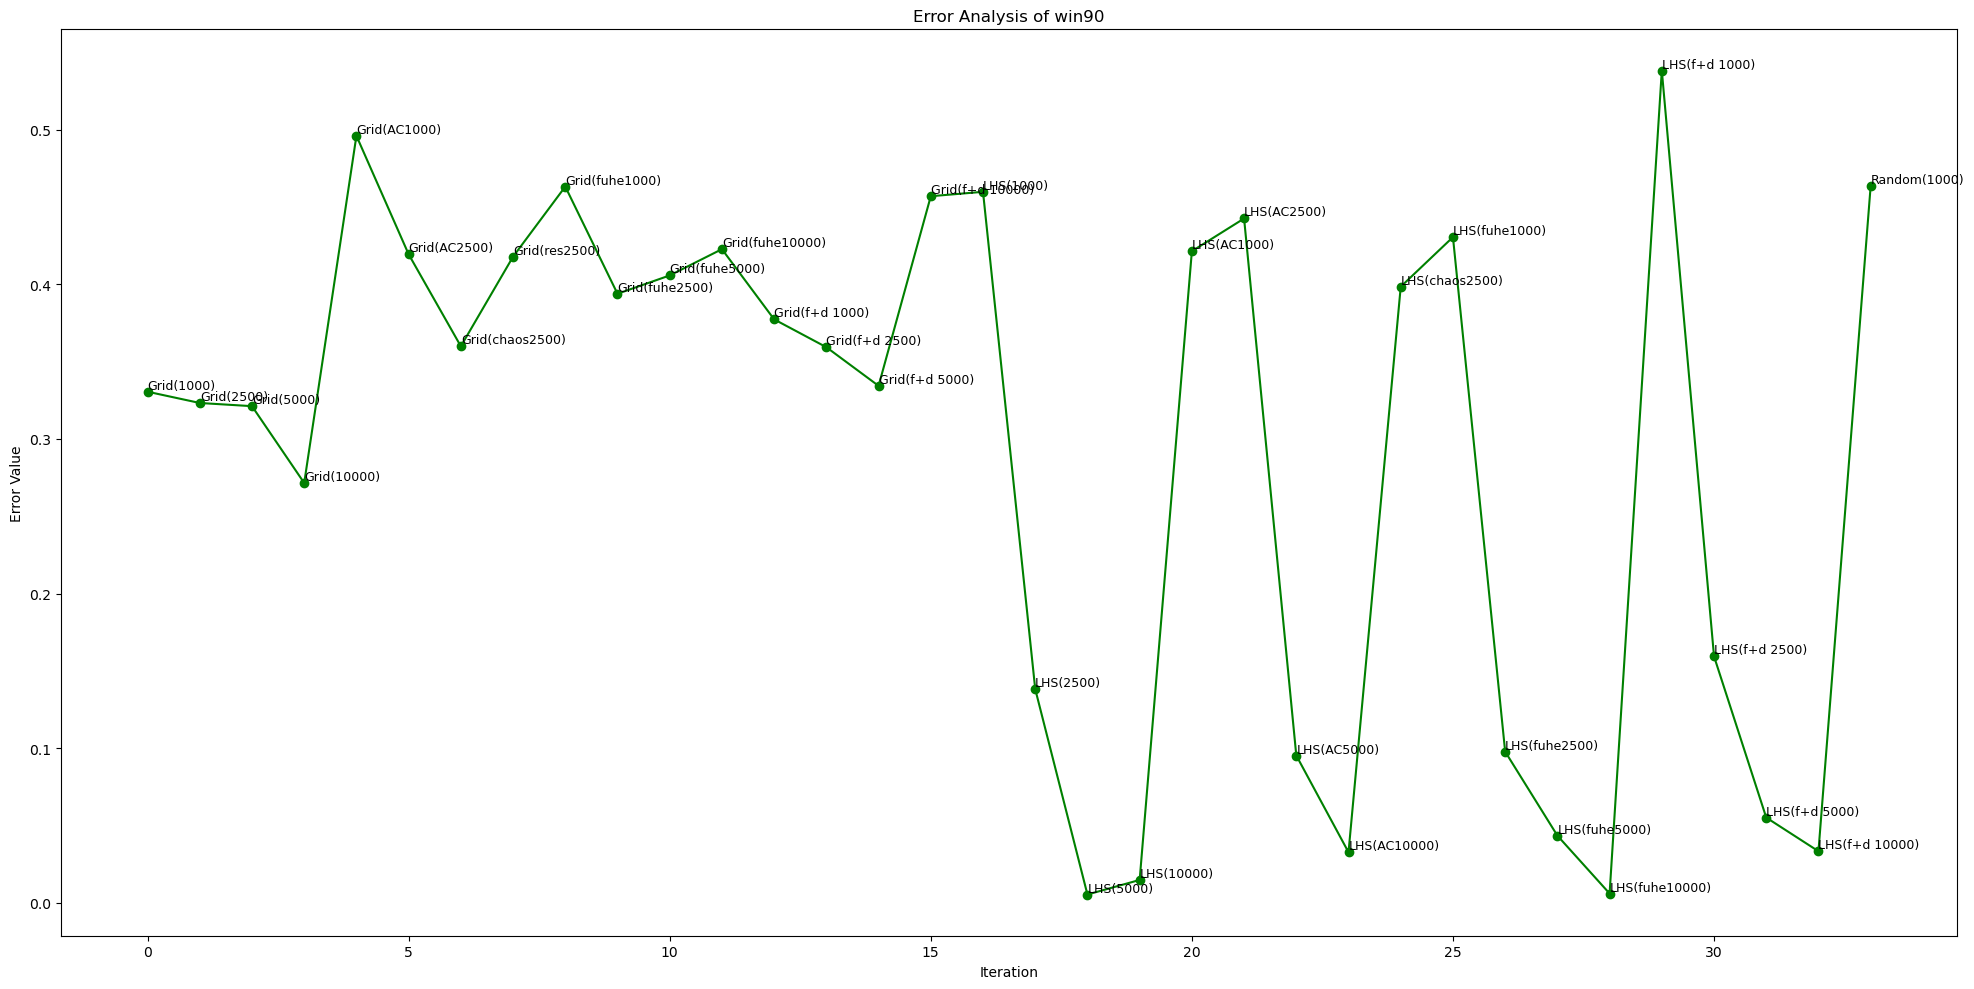

In [2]:

error = [3.464183e-01, 3.956620e-01, 3.212311e-01, 2.715667e-01, 4.960633e-01, 4.194536e-01, 3.599518e-01, 4.178967e-01, 4.632289e-01, 3.939151e-01, 4.057672e-01, 4.227619e-01, 3.773615e-01, 3.593673e-01, 
         3.343702e-01, 4.569996e-01, 4.598474e-01, 1.382679e-01, 5.429850e-03, 1.485587e-02, 4.214392e-01, 4.425896e-01, 9.531833e-02, 3.276157e-02, 3.984640e-01, 4.305556e-01, 9.782377e-02, 4.352411e-02, 
         6.072795e-03, 5.382721e-01, 1.594447e-01, 5.518820e-02, 3.340949e-02, 4.637131e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

plt.figure(figsize=(20, 10))  # 调整整体图表尺寸



plt.plot(error, '-o', color='green')
for i, value in enumerate(error):
    plt.text(i, value, labels[i], fontsize=9, verticalalignment='bottom')  # 添加标签
plt.title('Error Analysis of win90')
plt.ylabel('Error Value')
plt.xlabel('Iteration')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()

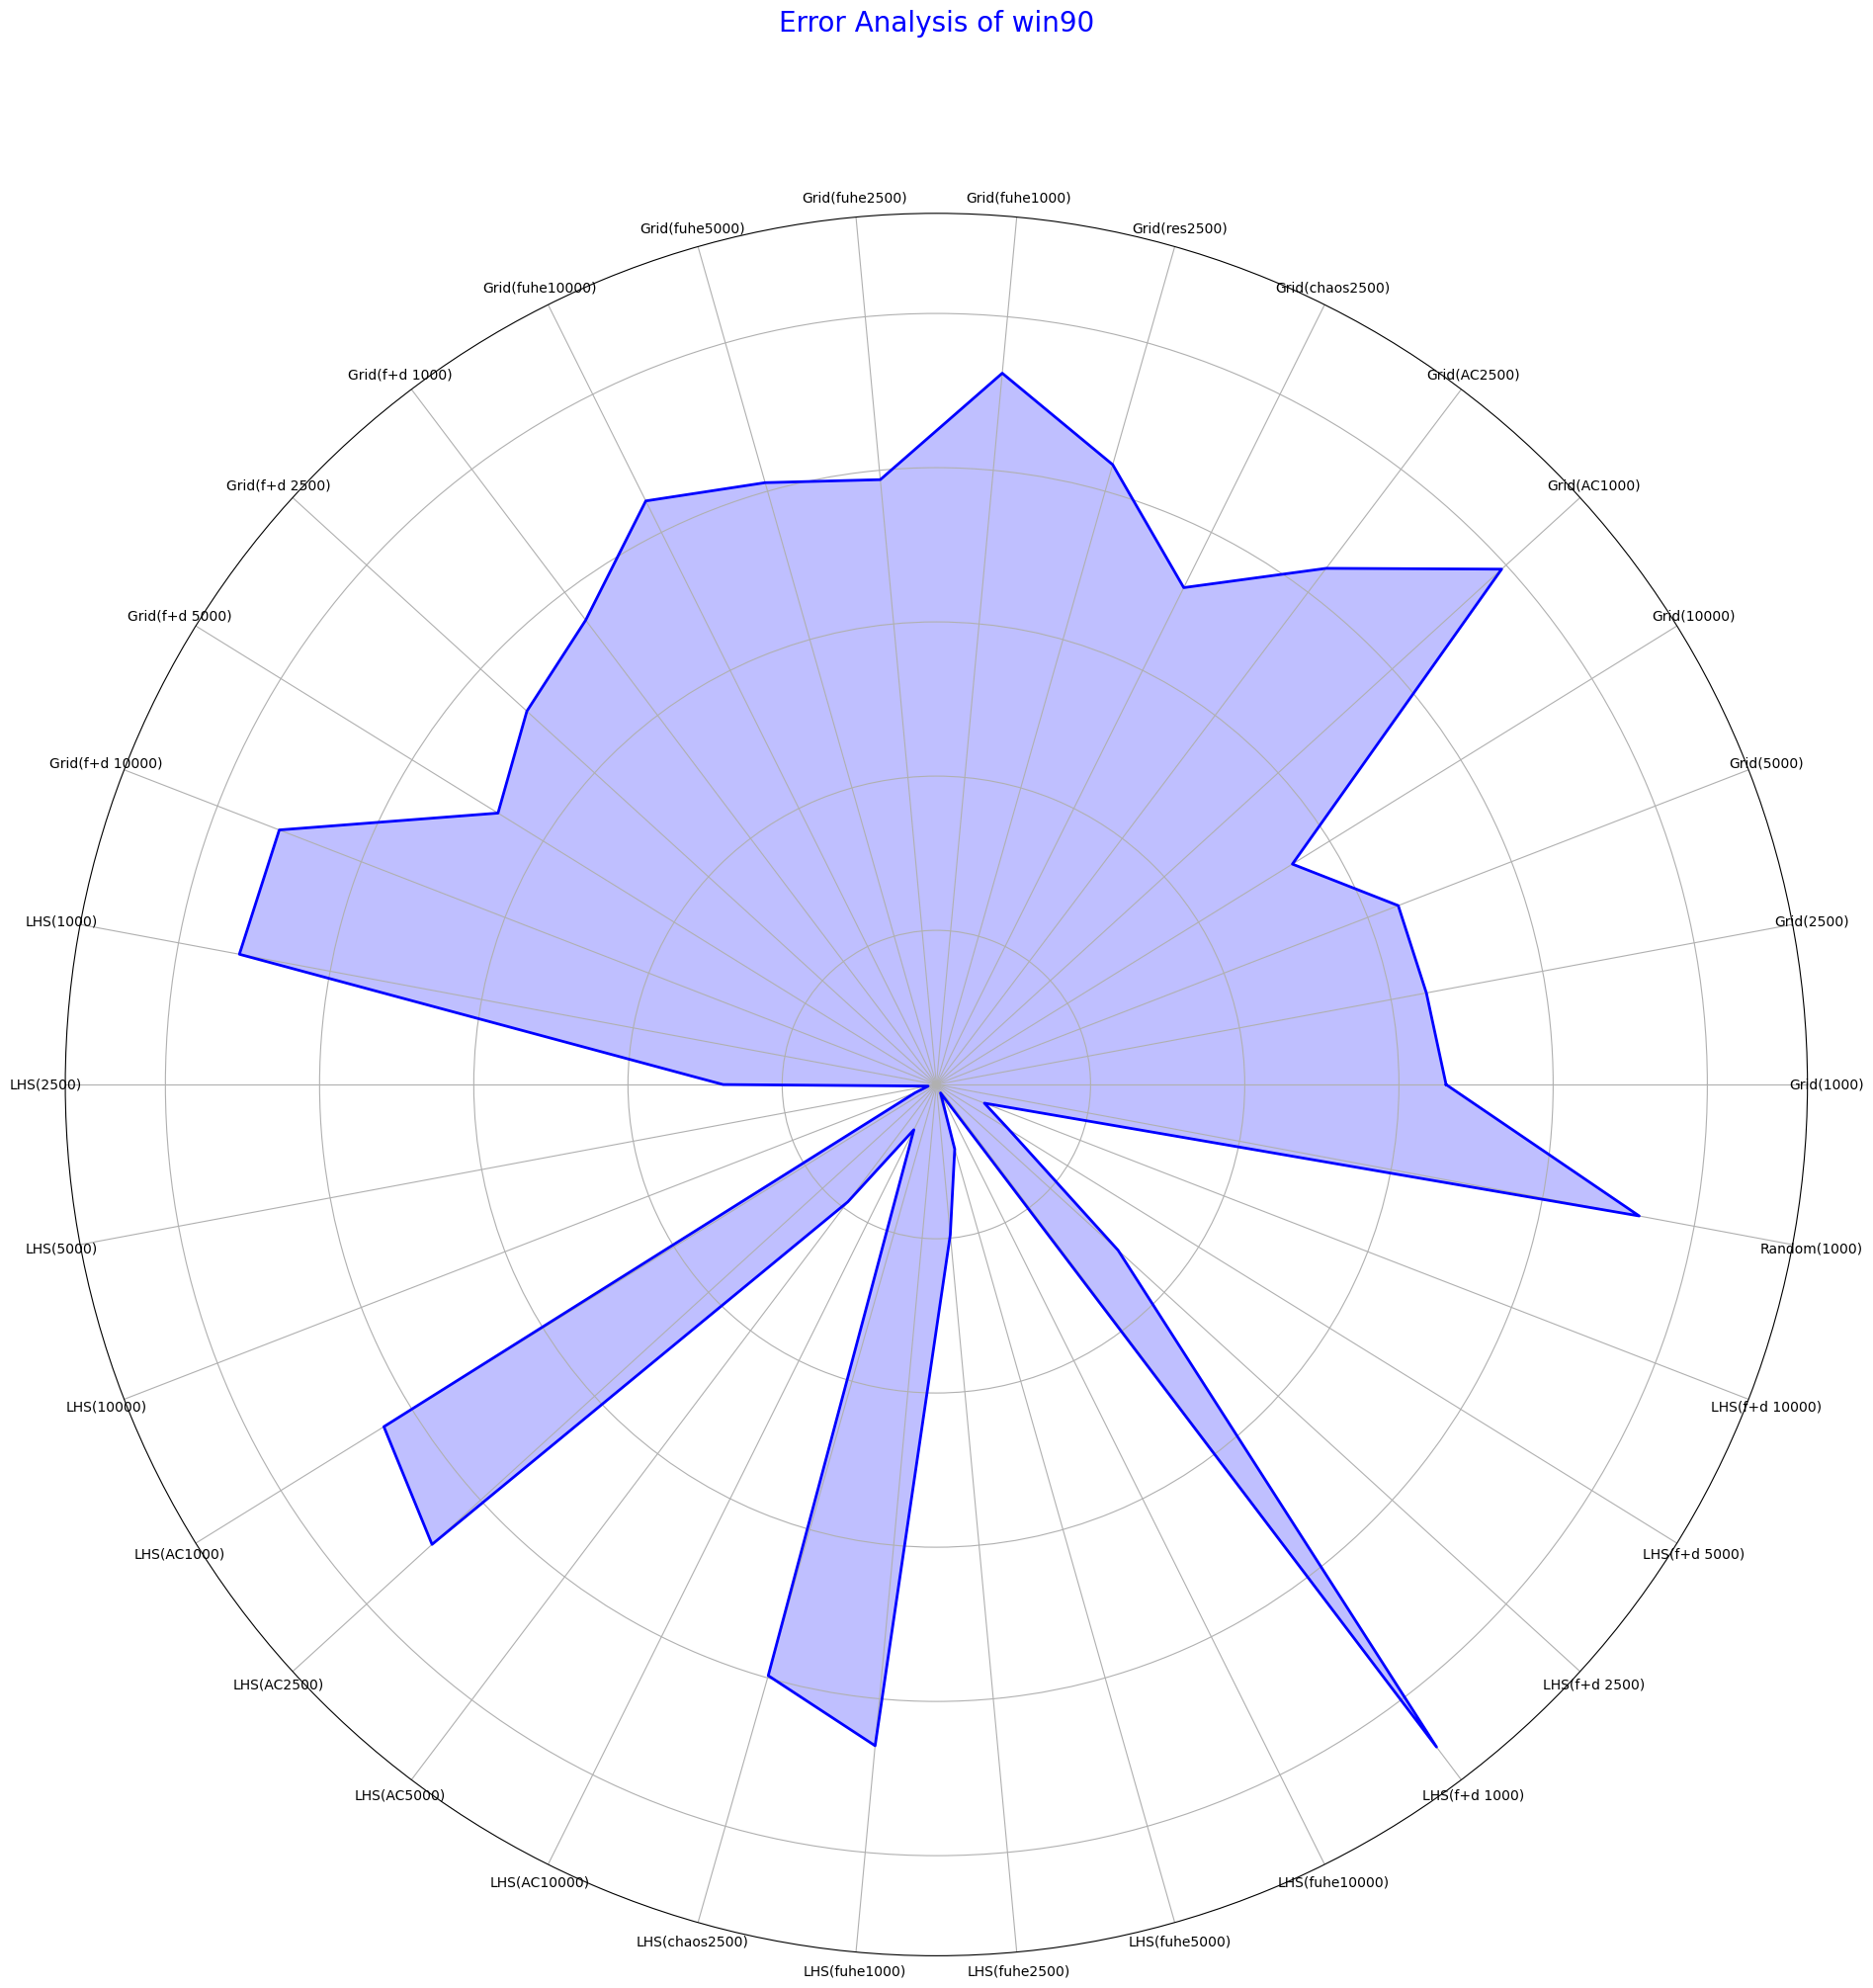

In [3]:
# from adjustText import adjust_text
error = [3.305766e-01, 3.232907e-01, 3.212311e-01, 2.715667e-01, 4.960633e-01, 4.194536e-01, 3.599518e-01, 4.178967e-01, 4.632289e-01, 3.939151e-01, 4.057672e-01, 4.227619e-01, 3.773615e-01, 3.593673e-01, 
         3.343702e-01, 4.569996e-01, 4.598474e-01, 1.382679e-01, 5.429850e-03, 1.485587e-02, 4.214392e-01, 4.425896e-01, 9.531833e-02, 3.276157e-02, 3.984640e-01, 4.305556e-01, 9.782377e-02, 4.352411e-02, 
         6.072795e-03, 5.382721e-01, 1.594447e-01, 5.518820e-02, 3.340949e-02, 4.637131e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

# error = np.log10(error)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
error += error[:1]
angles += angles[:1]

# 创建雷达图
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(polar=True))
ax.fill(angles, error, color='b', alpha=0.25)
ax.plot(angles, error, color='b', linewidth=2)

# 设置标题和轴标签
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=90)

# 设置图表标题
plt.title('Error Analysis of win90', size=20, color='b', y=1.1)

# 显示图表
plt.tight_layout()
plt.show()

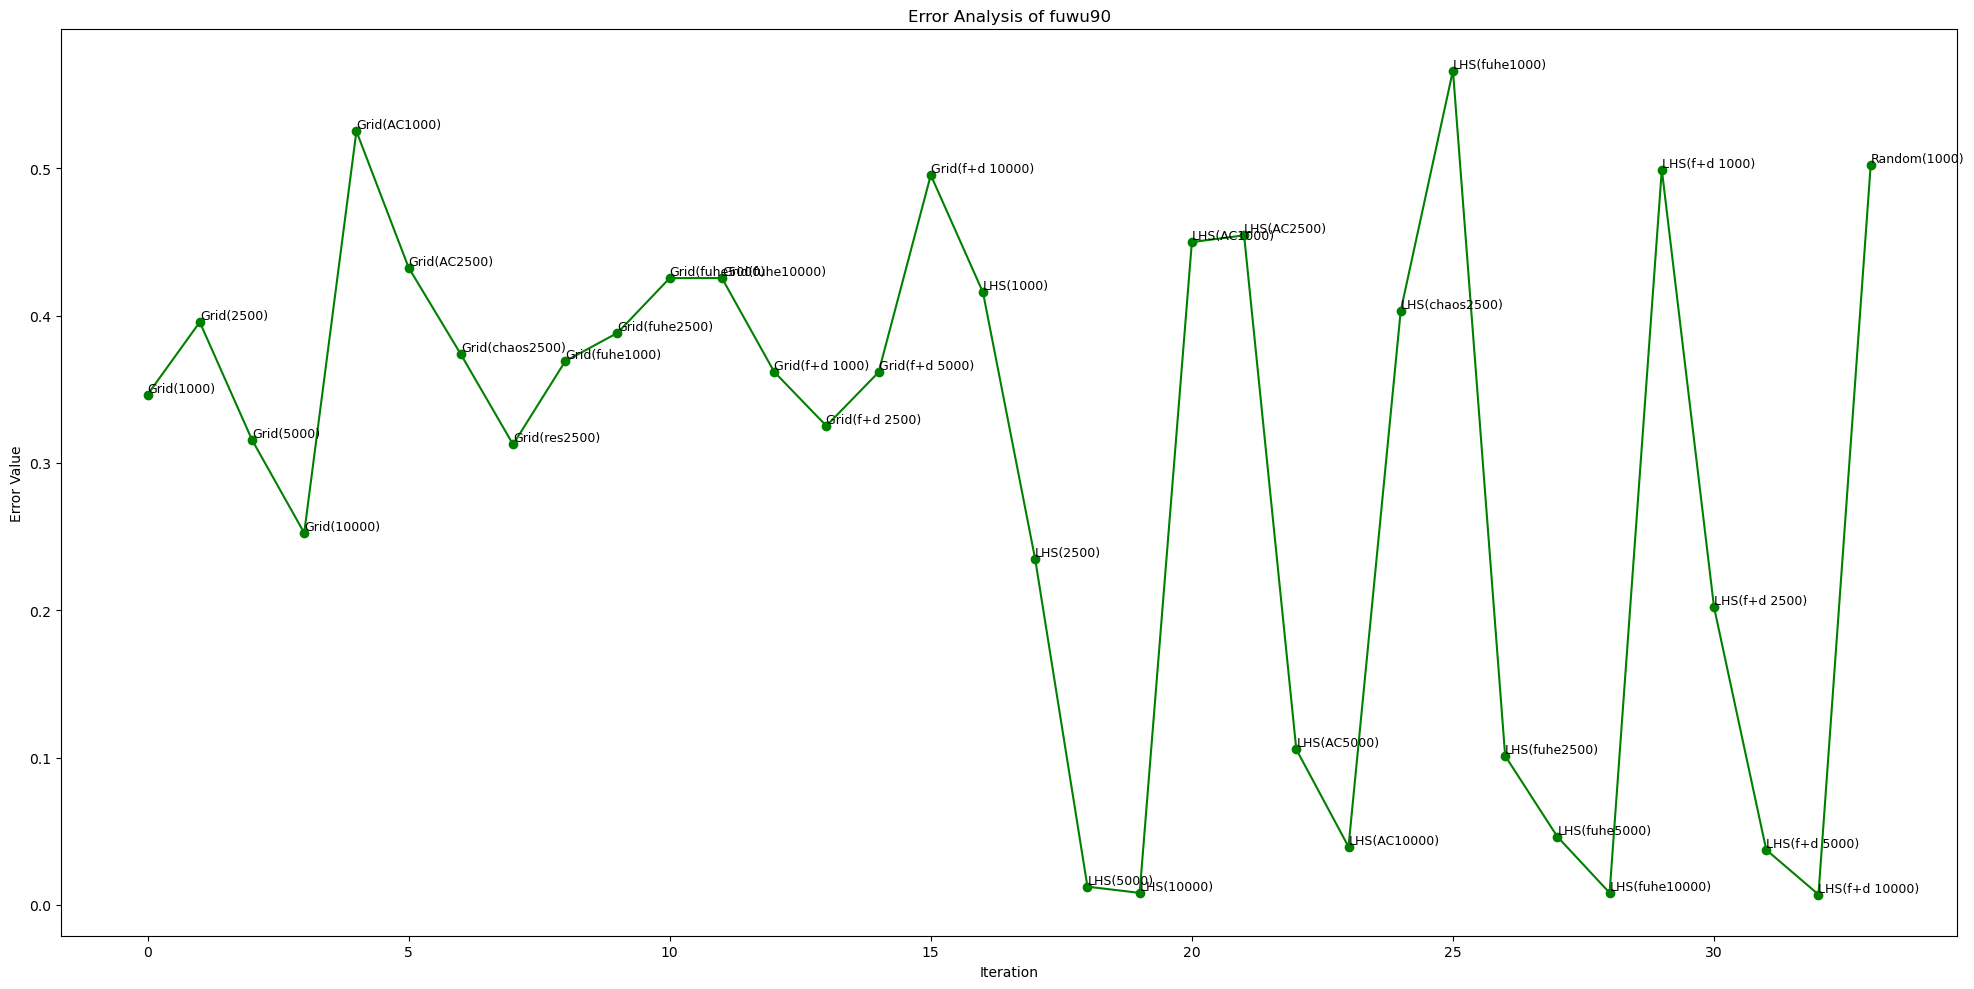

In [4]:


error = [3.464183e-01, 3.956620e-01, 3.157381e-01, 2.524955e-01, 5.252641e-01, 4.326399e-01, 3.737841e-01, 3.125835e-01, 3.691312e-01, 3.883392e-01, 4.255347e-01, 4.255663e-01, 3.619217e-01, 3.251856e-01, 
         3.616245e-01, 4.955025e-01, 4.157821e-01, 2.345270e-01, 1.231849e-02, 8.082515e-03, 4.499974e-01, 4.545603e-01, 1.055309e-01, 3.940449e-02, 4.033830e-01, 5.664751e-01, 1.011472e-01, 4.623390e-02, 
         8.150447e-03, 4.992319e-01, 2.021103e-01, 3.732858e-02, 6.982077e-03, 5.022143e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

plt.figure(figsize=(20, 10))  # 调整整体图表尺寸






plt.plot(error, '-o', color='green')
for i, value in enumerate(error):
    plt.text(i, value, labels[i], fontsize=9, verticalalignment='bottom')  # 添加标签
plt.title('Error Analysis of fuwu90')
plt.ylabel('Error Value')
plt.xlabel('Iteration')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()

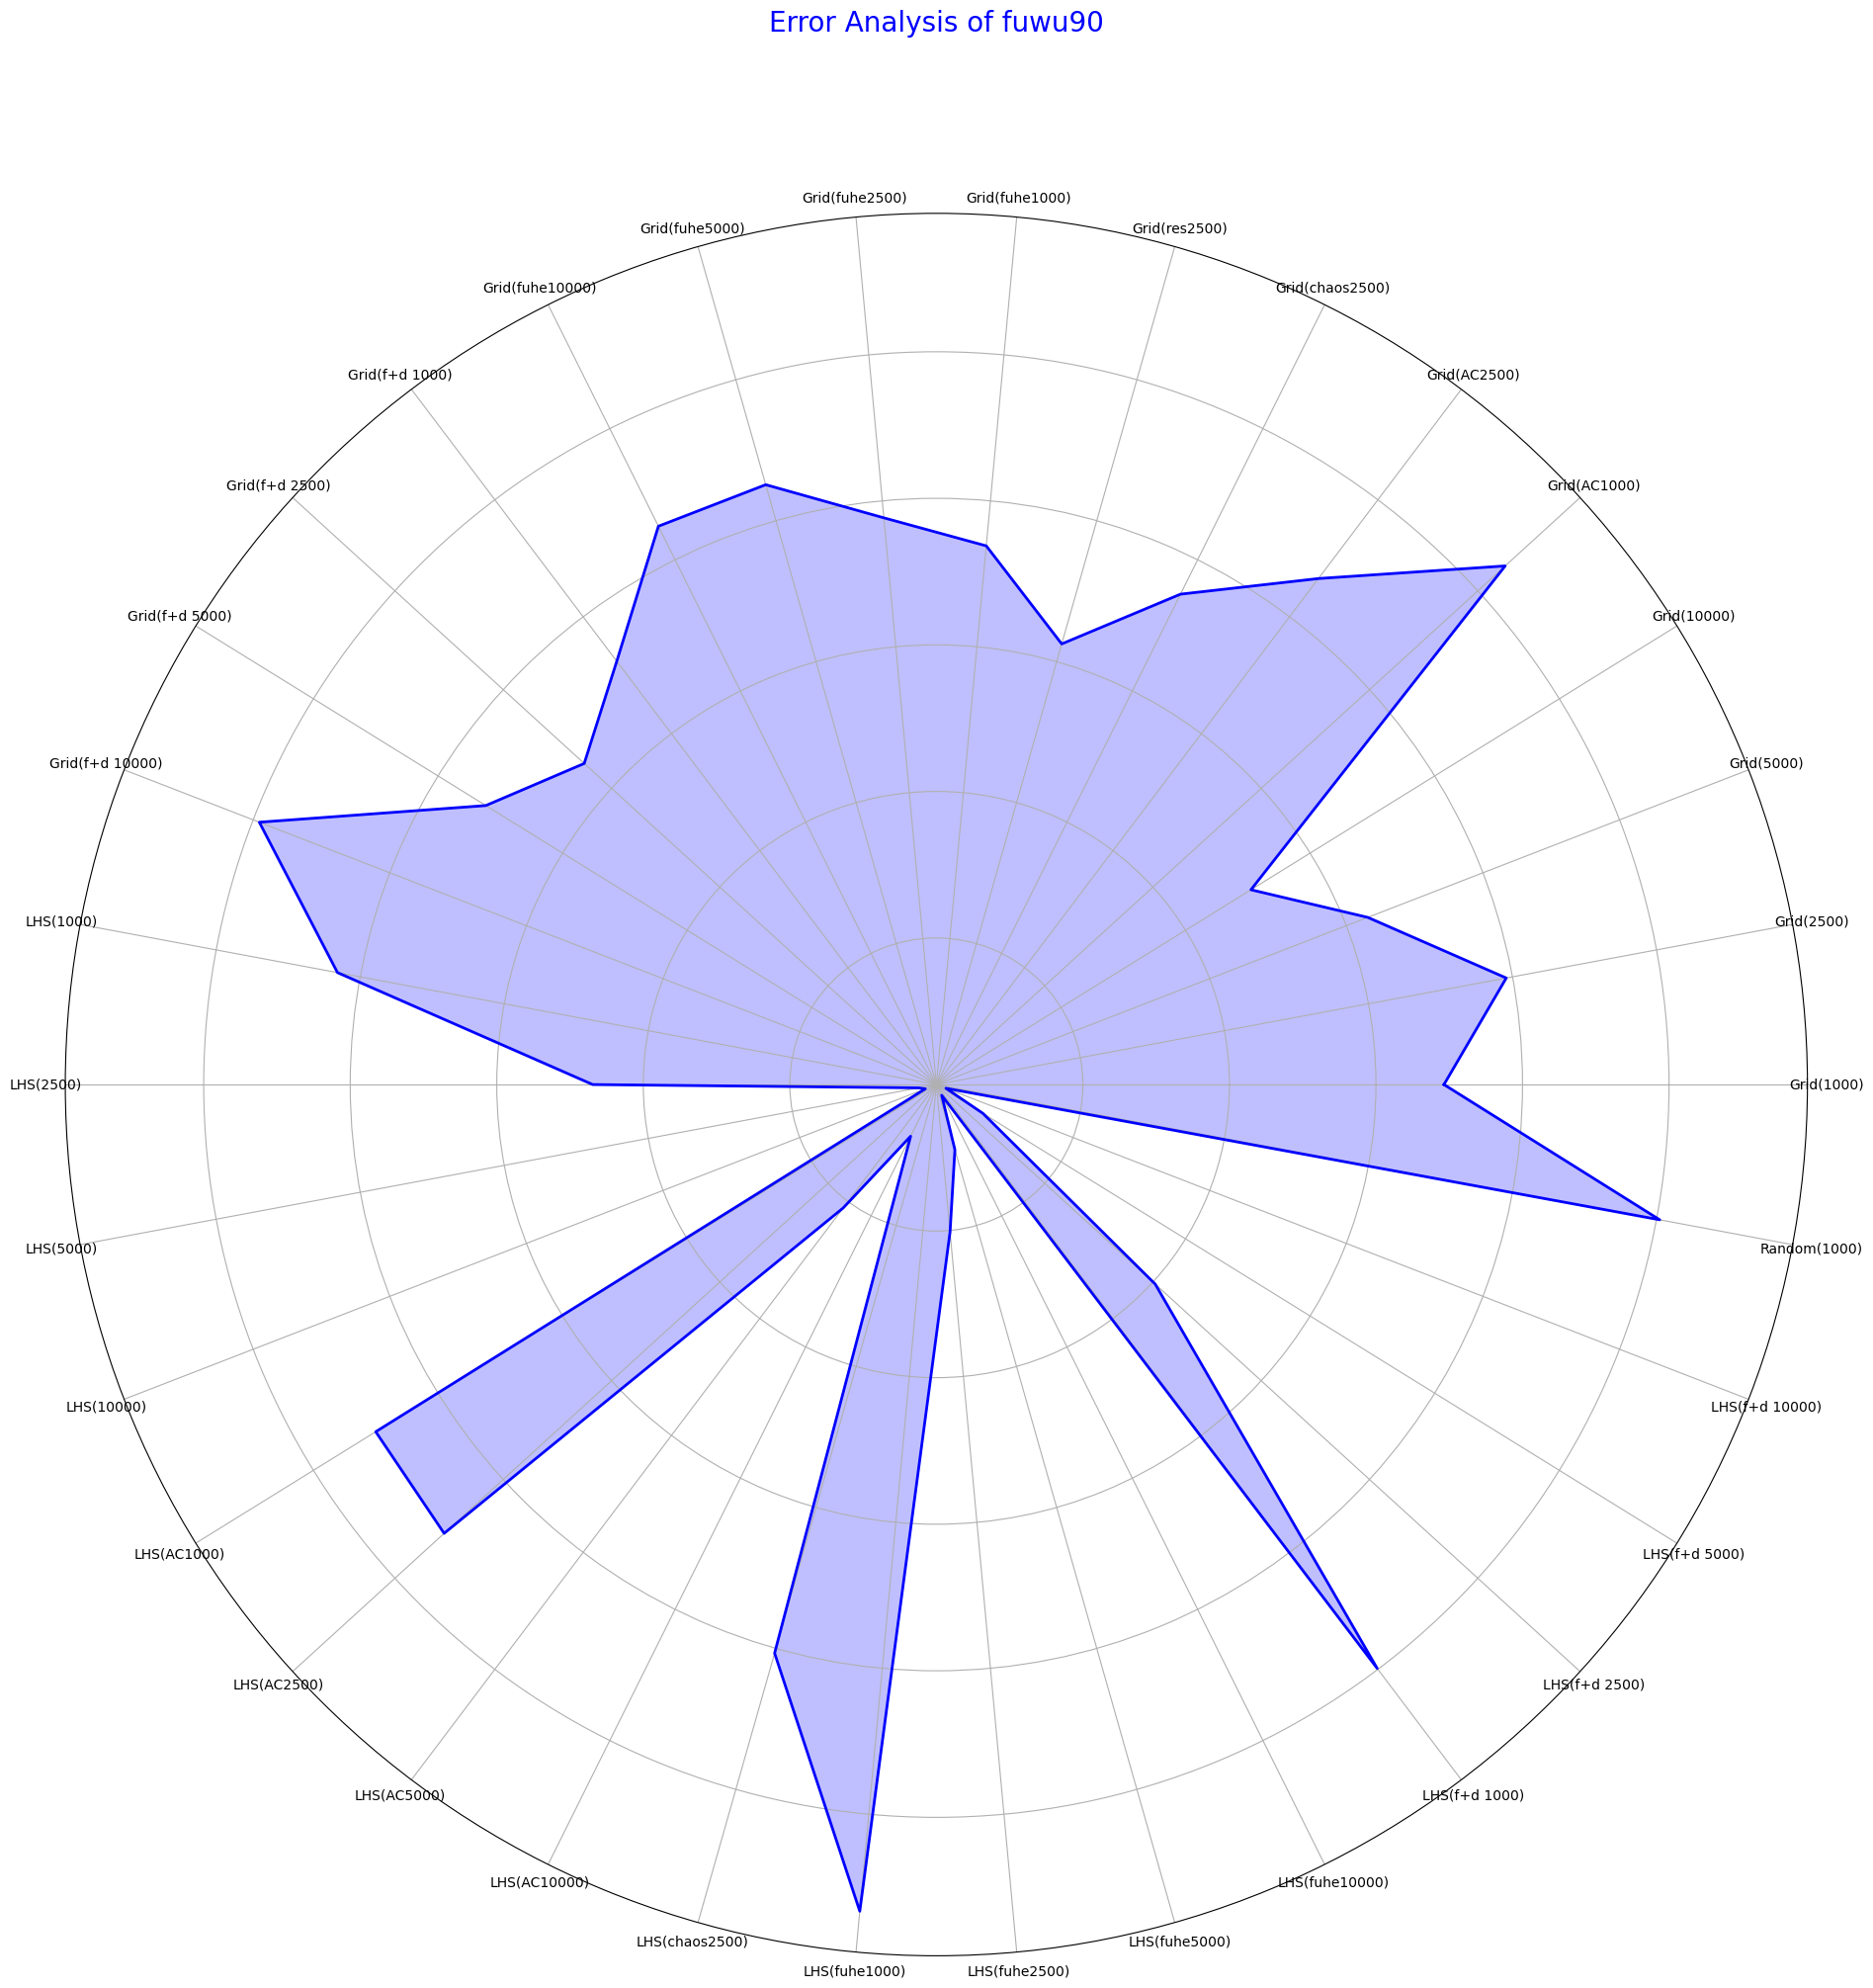

In [5]:
# from adjustText import adjust_text
error = [3.464183e-01, 3.956620e-01, 3.157381e-01, 2.524955e-01, 5.252641e-01, 4.326399e-01, 3.737841e-01, 3.125835e-01, 3.691312e-01, 3.883392e-01, 4.255347e-01, 4.255663e-01, 3.619217e-01, 3.251856e-01, 
         3.616245e-01, 4.955025e-01, 4.157821e-01, 2.345270e-01, 1.231849e-02, 8.082515e-03, 4.499974e-01, 4.545603e-01, 1.055309e-01, 3.940449e-02, 4.033830e-01, 5.664751e-01, 1.011472e-01, 4.623390e-02, 
         8.150447e-03, 4.992319e-01, 2.021103e-01, 3.732858e-02, 6.982077e-03, 5.022143e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

# error = np.log10(error)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
error += error[:1]
angles += angles[:1]

# 创建雷达图
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(polar=True))
ax.fill(angles, error, color='b', alpha=0.25)
ax.plot(angles, error, color='b', linewidth=2)

# 设置标题和轴标签
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=90)

# 设置图表标题
plt.title('Error Analysis of fuwu90', size=20, color='b', y=1.1)

# 显示图表
plt.tight_layout()
plt.show()

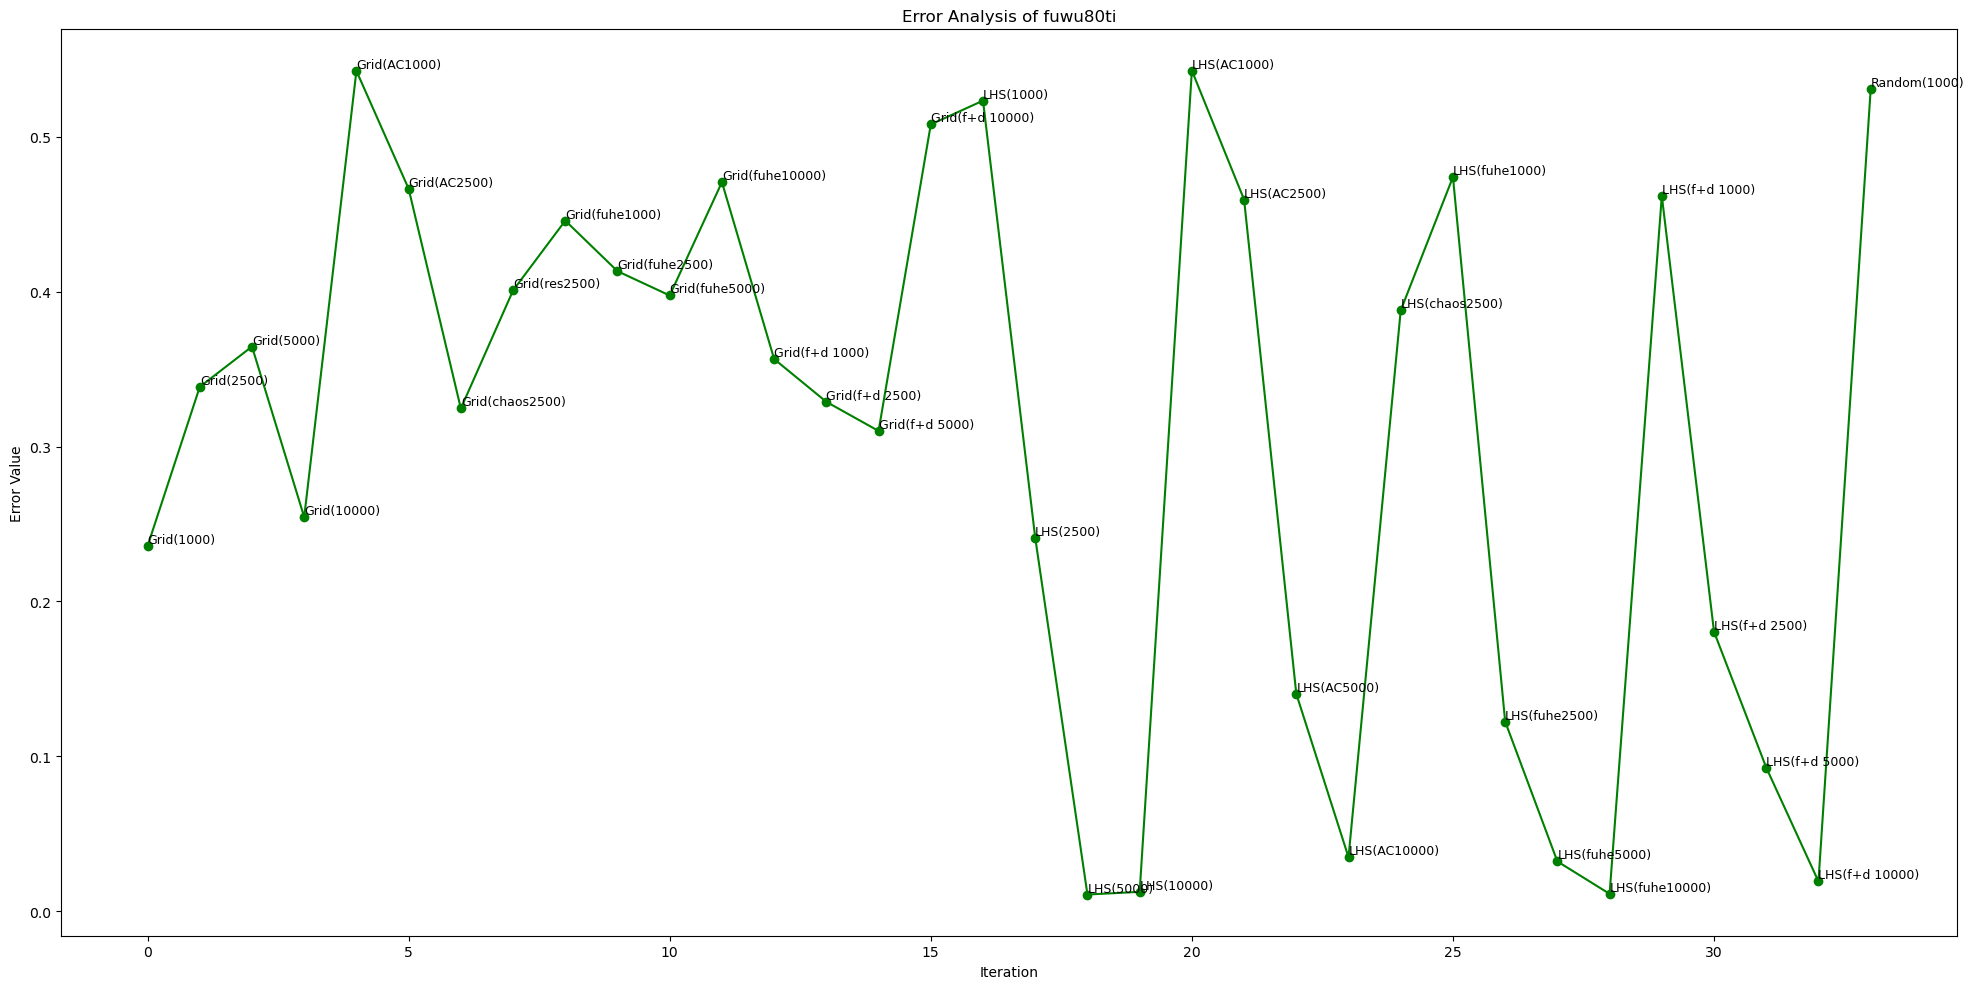

In [6]:


error = [2.357448e-01, 3.385267e-01, 3.645543e-01, 2.544757e-01, 5.425111e-01, 4.664010e-01, 3.245727e-01, 4.007832e-01, 4.458364e-01, 4.132061e-01, 3.975221e-01, 4.706864e-01, 3.564898e-01, 3.288724e-01, 
         3.100787e-01, 5.079403e-01, 5.232909e-01, 2.411375e-01, 1.083875e-02, 1.256295e-02, 5.427342e-01, 4.594184e-01, 1.403831e-01, 3.489929e-02, 3.879158e-01, 4.739839e-01, 1.225018e-01, 3.220757e-02, 
         1.126952e-02, 4.618508e-01, 1.804520e-01, 9.279893e-02, 1.927373e-02, 5.305037e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

plt.figure(figsize=(20, 10))  # 调整整体图表尺寸






plt.plot(error, '-o', color='green')
for i, value in enumerate(error):
    plt.text(i, value, labels[i], fontsize=9, verticalalignment='bottom')  # 添加标签
plt.title('Error Analysis of fuwu80ti')
plt.ylabel('Error Value')
plt.xlabel('Iteration')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()

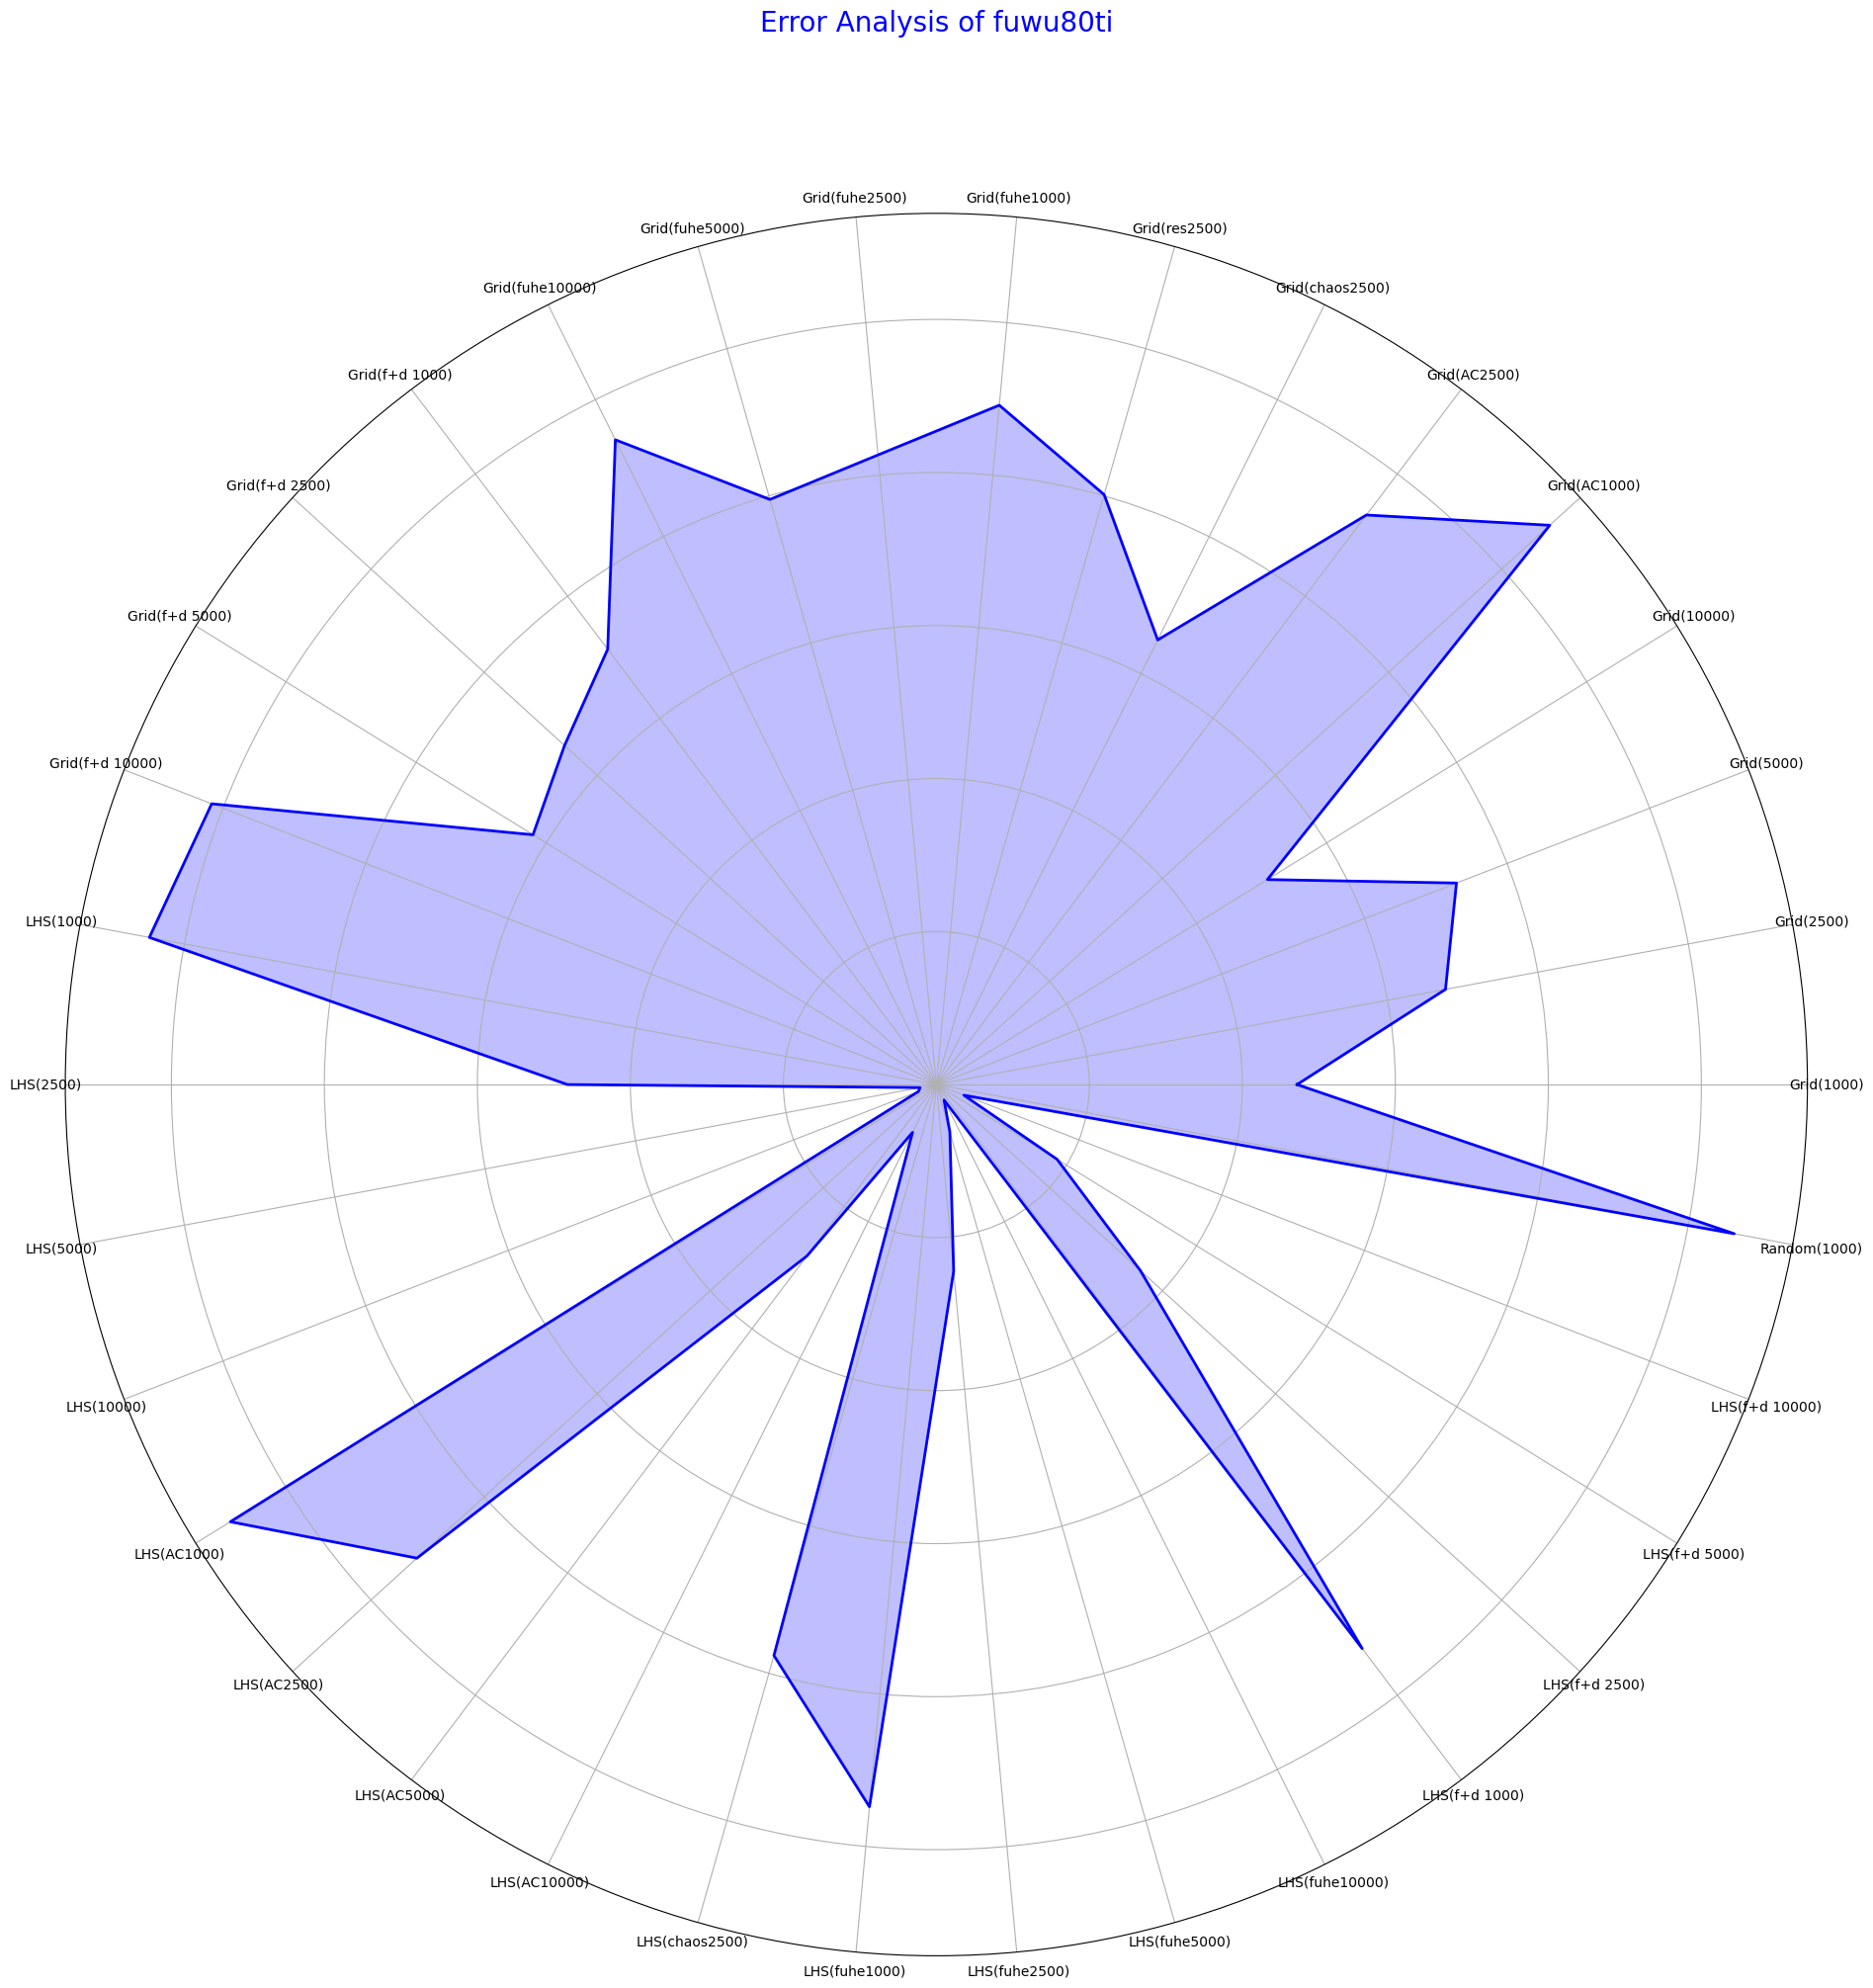

In [7]:
# from adjustText import adjust_text
error = [2.357448e-01, 3.385267e-01, 3.645543e-01, 2.544757e-01, 5.425111e-01, 4.664010e-01, 3.245727e-01, 4.007832e-01, 4.458364e-01, 4.132061e-01, 3.975221e-01, 4.706864e-01, 3.564898e-01, 3.288724e-01, 
         3.100787e-01, 5.079403e-01, 5.232909e-01, 2.411375e-01, 1.083875e-02, 1.256295e-02, 5.427342e-01, 4.594184e-01, 1.403831e-01, 3.489929e-02, 3.879158e-01, 4.739839e-01, 1.225018e-01, 3.220757e-02, 
         1.126952e-02, 4.618508e-01, 1.804520e-01, 9.279893e-02, 1.927373e-02, 5.305037e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

# error = np.log10(error)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
error += error[:1]
angles += angles[:1]

# 创建雷达图
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(polar=True))
ax.fill(angles, error, color='b', alpha=0.25)
ax.plot(angles, error, color='b', linewidth=2)

# 设置标题和轴标签
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=90)

# 设置图表标题
plt.title('Error Analysis of fuwu80ti', size=20, color='b', y=1.1)

# 显示图表
plt.tight_layout()
plt.show()

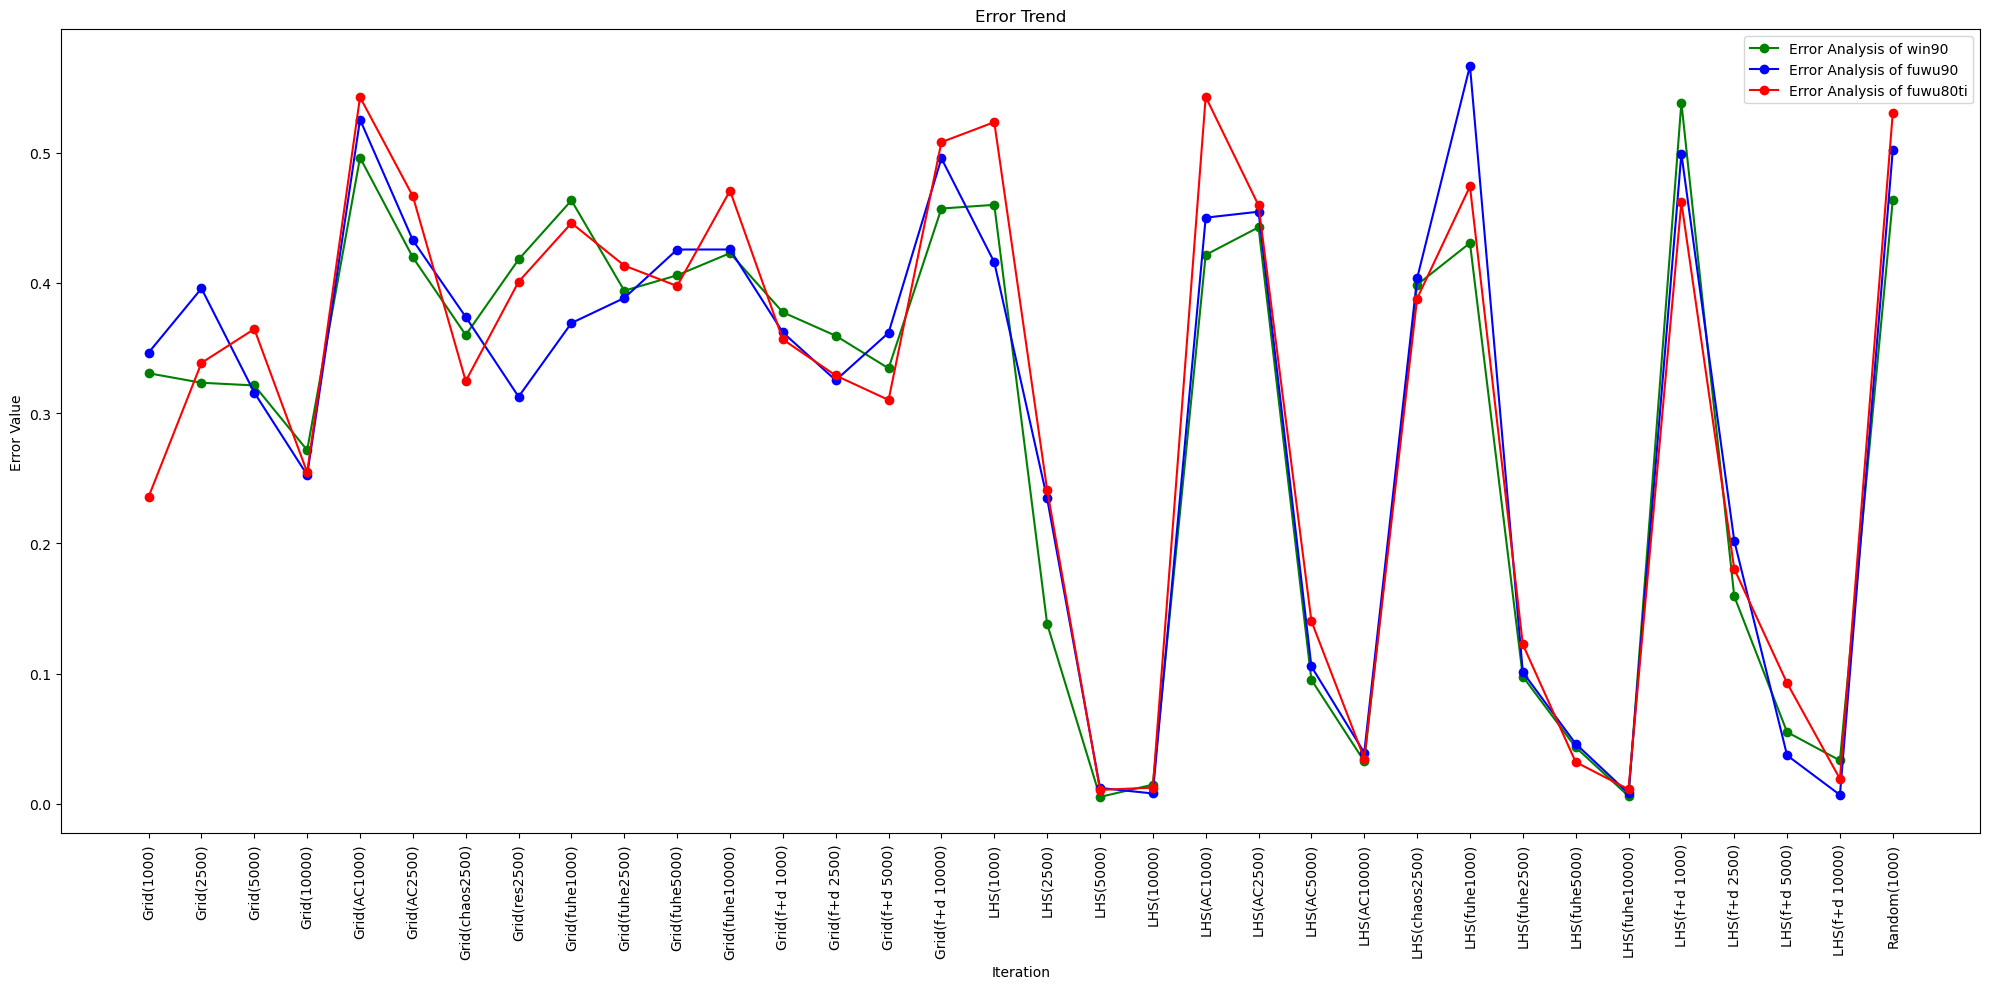

In [8]:
error1 = [3.305766e-01, 3.232907e-01, 3.212311e-01, 2.715667e-01, 4.960633e-01, 4.194536e-01, 3.599518e-01, 4.178967e-01, 4.632289e-01, 3.939151e-01, 4.057672e-01, 4.227619e-01, 3.773615e-01, 3.593673e-01, 
         3.343702e-01, 4.569996e-01, 4.598474e-01, 1.382679e-01, 5.429850e-03, 1.485587e-02, 4.214392e-01, 4.425896e-01, 9.531833e-02, 3.276157e-02, 3.984640e-01, 4.305556e-01, 9.782377e-02, 4.352411e-02, 
         6.072795e-03, 5.382721e-01, 1.594447e-01, 5.518820e-02, 3.340949e-02, 4.637131e-01]

error2 = [3.464183e-01, 3.956620e-01, 3.157381e-01, 2.524955e-01, 5.252641e-01, 4.326399e-01, 3.737841e-01, 3.125835e-01, 3.691312e-01, 3.883392e-01, 4.255347e-01, 4.255663e-01, 3.619217e-01, 3.251856e-01, 
         3.616245e-01, 4.955025e-01, 4.157821e-01, 2.345270e-01, 1.231849e-02, 8.082515e-03, 4.499974e-01, 4.545603e-01, 1.055309e-01, 3.940449e-02, 4.033830e-01, 5.664751e-01, 1.011472e-01, 4.623390e-02, 
         8.150447e-03, 4.992319e-01, 2.021103e-01, 3.732858e-02, 6.982077e-03, 5.022143e-01]

error3 = [2.357448e-01, 3.385267e-01, 3.645543e-01, 2.544757e-01, 5.425111e-01, 4.664010e-01, 3.245727e-01, 4.007832e-01, 4.458364e-01, 4.132061e-01, 3.975221e-01, 4.706864e-01, 3.564898e-01, 3.288724e-01, 
         3.100787e-01, 5.079403e-01, 5.232909e-01, 2.411375e-01, 1.083875e-02, 1.256295e-02, 5.427342e-01, 4.594184e-01, 1.403831e-01, 3.489929e-02, 3.879158e-01, 4.739839e-01, 1.225018e-01, 3.220757e-02, 
         1.126952e-02, 4.618508e-01, 1.804520e-01, 9.279893e-02, 1.927373e-02, 5.305037e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

plt.figure(figsize=(20, 10))  # 调整整体图表尺寸


# 绘制 error1 和 error2
plt.plot(error1, '-o', color='green', label='Error Analysis of win90')
plt.plot(error2, '-o', color='blue', label='Error Analysis of fuwu90')
plt.plot(error3, '-o', color='red', label='Error Analysis of fuwu80ti')

# 设置 x 轴标签
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)

plt.title('Error Trend')
plt.ylabel('Error Value')
plt.xlabel('Iteration')
plt.legend()  # 显示图例
plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()

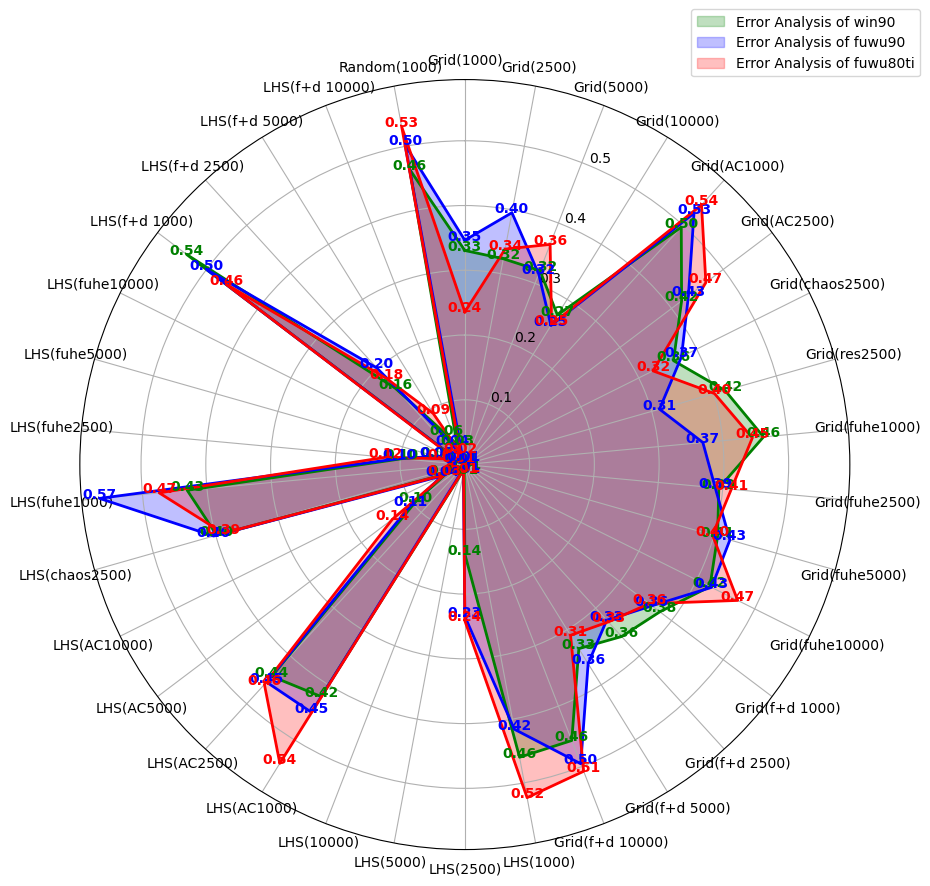

In [9]:
from matplotlib.patches import Patch

error1 = [3.305766e-01, 3.232907e-01, 3.212311e-01, 2.715667e-01, 4.960633e-01, 4.194536e-01, 3.599518e-01, 4.178967e-01, 4.632289e-01, 3.939151e-01, 4.057672e-01, 4.227619e-01, 3.773615e-01, 3.593673e-01, 
         3.343702e-01, 4.569996e-01, 4.598474e-01, 1.382679e-01, 5.429850e-03, 1.485587e-02, 4.214392e-01, 4.425896e-01, 9.531833e-02, 3.276157e-02, 3.984640e-01, 4.305556e-01, 9.782377e-02, 4.352411e-02, 
         6.072795e-03, 5.382721e-01, 1.594447e-01, 5.518820e-02, 3.340949e-02, 4.637131e-01]

error2 = [3.464183e-01, 3.956620e-01, 3.157381e-01, 2.524955e-01, 5.252641e-01, 4.326399e-01, 3.737841e-01, 3.125835e-01, 3.691312e-01, 3.883392e-01, 4.255347e-01, 4.255663e-01, 3.619217e-01, 3.251856e-01, 
         3.616245e-01, 4.955025e-01, 4.157821e-01, 2.345270e-01, 1.231849e-02, 8.082515e-03, 4.499974e-01, 4.545603e-01, 1.055309e-01, 3.940449e-02, 4.033830e-01, 5.664751e-01, 1.011472e-01, 4.623390e-02, 
         8.150447e-03, 4.992319e-01, 2.021103e-01, 3.732858e-02, 6.982077e-03, 5.022143e-01]

error3 = [2.357448e-01, 3.385267e-01, 3.645543e-01, 2.544757e-01, 5.425111e-01, 4.664010e-01, 3.245727e-01, 4.007832e-01, 4.458364e-01, 4.132061e-01, 3.975221e-01, 4.706864e-01, 3.564898e-01, 3.288724e-01, 
         3.100787e-01, 5.079403e-01, 5.232909e-01, 2.411375e-01, 1.083875e-02, 1.256295e-02, 5.427342e-01, 4.594184e-01, 1.403831e-01, 3.489929e-02, 3.879158e-01, 4.739839e-01, 1.225018e-01, 3.220757e-02, 
         1.126952e-02, 4.618508e-01, 1.804520e-01, 9.279893e-02, 1.927373e-02, 5.305037e-01]
labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC10000)", "LHS(chaos2500)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", 
           "LHS(fuhe10000)", "LHS(f+d 1000)", "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 10000)", "Random(1000)"]

# 计算角度
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 闭合雷达图

# 闭合数据
error1 += error1[:1]
error2 += error2[:1]
error3 += error3[:1]

# 创建雷达图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 绘制一条线和填充
ax.plot(angles, error1, color='green', linewidth=2, linestyle='solid', label='Error1')
ax.fill(angles, error1, color='green', alpha=0.25)

ax.plot(angles, error2, color='blue', linewidth=2, linestyle='solid', label='Error2')
ax.fill(angles, error2, color='blue', alpha=0.25)

ax.plot(angles, error3, color='red', linewidth=2, linestyle='solid', label='Error3')
ax.fill(angles, error3, color='red', alpha=0.25)

# 添加标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# 添加数据点标签
for i, label in enumerate(labels):
    ax.text(angles[i], error1[i], f'{error1[i]:.2f}', horizontalalignment='center', size=10, color='green', weight='semibold')
    ax.text(angles[i], error2[i], f'{error2[i]:.2f}', horizontalalignment='center', size=10, color='blue', weight='semibold')
    ax.text(angles[i], error3[i], f'{error3[i]:.2f}', horizontalalignment='center', size=10, color='red', weight='semibold')

# 添加图例
legend_elements = [Patch(facecolor='green', edgecolor='green', alpha=0.25, label='Error Analysis of win90'),
                   Patch(facecolor='blue', edgecolor='blue', alpha=0.25, label='Error Analysis of fuwu90'),
                   Patch(facecolor='red', edgecolor='red', alpha=0.25, label='Error Analysis of fuwu80ti')]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

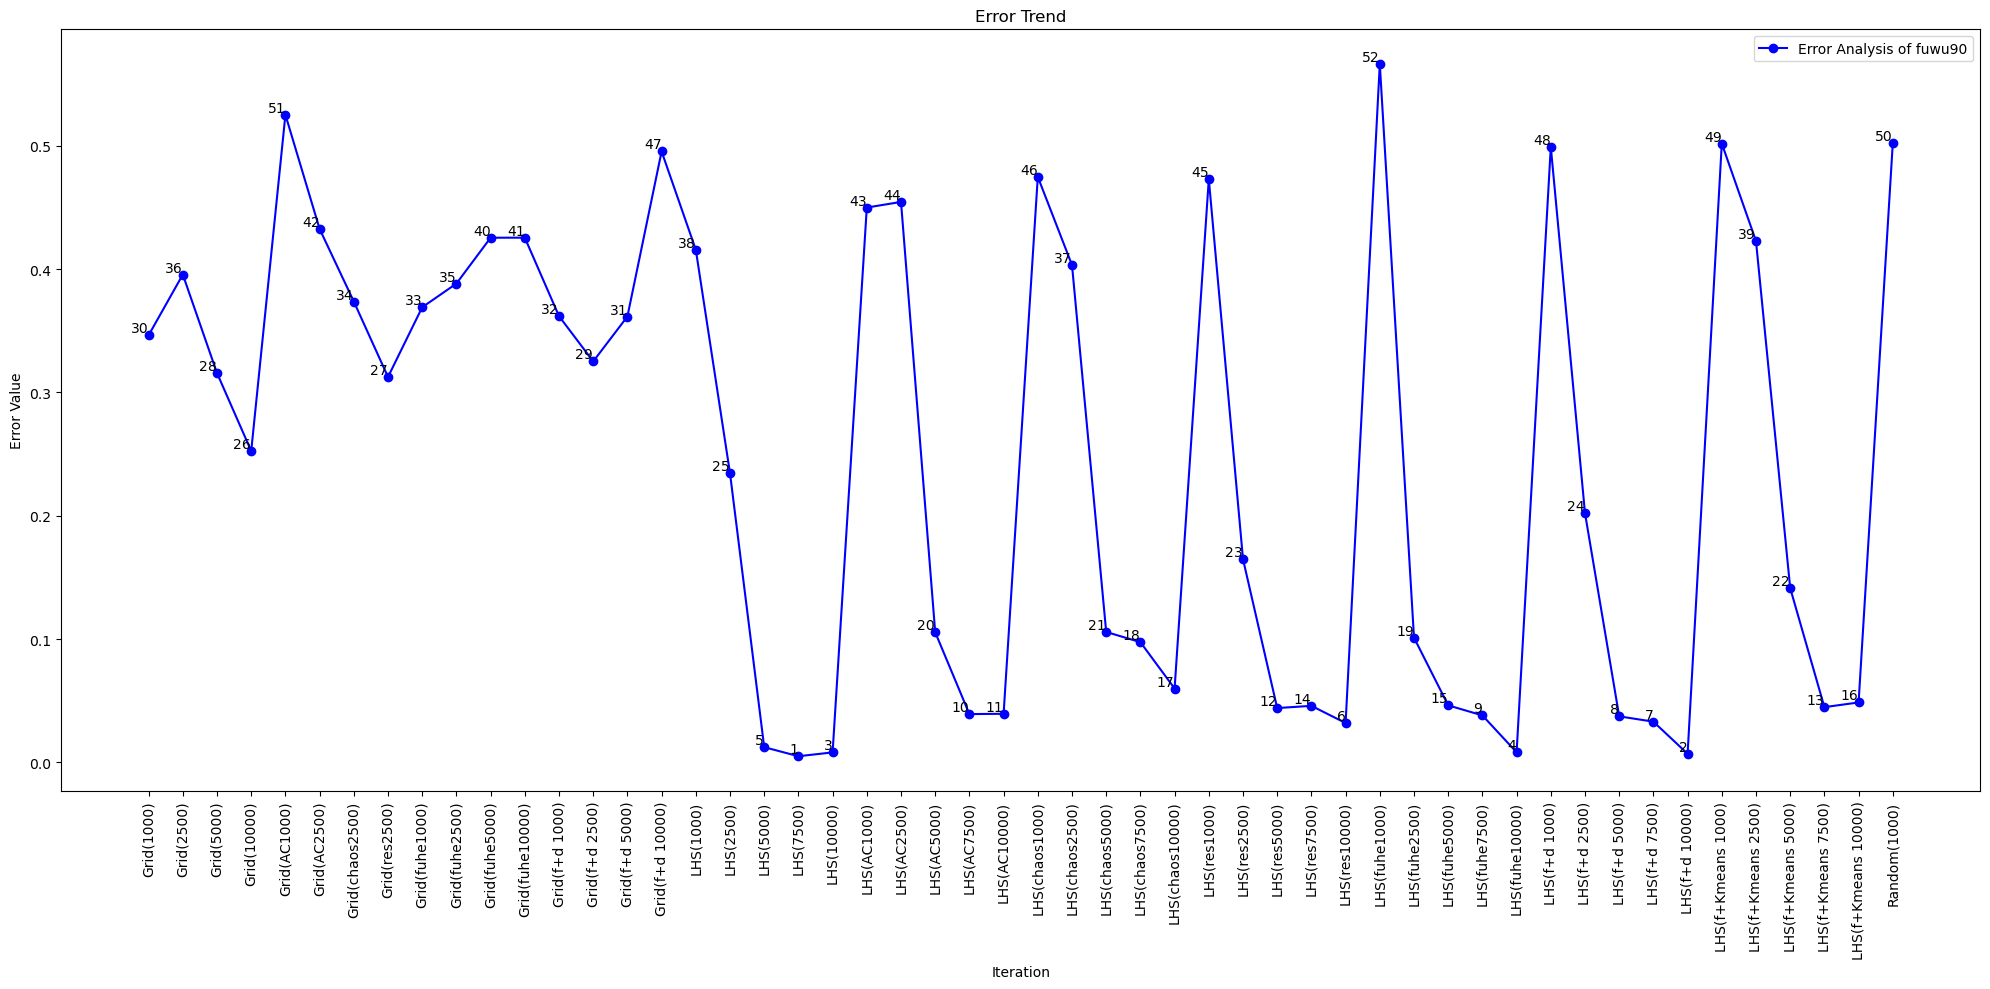

In [15]:

error = [3.464183e-01, 3.956620e-01, 3.157381e-01, 2.524955e-01, 5.252641e-01, 4.326399e-01, 3.737841e-01, 3.125835e-01, 3.691312e-01, 3.883392e-01, 4.255347e-01, 4.255663e-01, 3.619217e-01, 3.251856e-01, 
         3.616245e-01, 4.955025e-01, 4.157821e-01, 2.345270e-01, 1.231849e-02, 4.972745e-03, 8.082515e-03, 4.499974e-01, 4.545603e-01, 1.055309e-01, 3.913921e-02, 3.940449e-02, 4.749005e-01, 4.033830e-01, 
         1.057684e-01, 9.749184e-02, 5.990423e-02, 4.730657e-01, 1.647863e-01, 4.403652e-02, 4.584097e-02, 3.191667e-02, 5.664751e-01, 1.011472e-01, 4.623390e-02, 3.810301e-02, 8.150447e-03, 4.992319e-01, 
         2.021103e-01, 3.732858e-02, 3.299760e-02, 6.982077e-03, 5.019185e-01, 4.228088e-01, 1.413602e-01, 4.479386e-02, 4.858990e-02, 5.022143e-01]


labels = ["Grid(1000)", "Grid(2500)", "Grid(5000)", "Grid(10000)", "Grid(AC1000)", "Grid(AC2500)", "Grid(chaos2500)", "Grid(res2500)", "Grid(fuhe1000)", "Grid(fuhe2500)", "Grid(fuhe5000)", "Grid(fuhe10000)", "Grid(f+d 1000)", "Grid(f+d 2500)",
           "Grid(f+d 5000)", "Grid(f+d 10000)", "LHS(1000)", "LHS(2500)", "LHS(5000)", "LHS(7500)", "LHS(10000)", "LHS(AC1000)", "LHS(AC2500)", "LHS(AC5000)", "LHS(AC7500)", "LHS(AC10000)", "LHS(chaos1000)", "LHS(chaos2500)", 
           "LHS(chaos5000)", "LHS(chaos7500)", "LHS(chaos10000)", "LHS(res1000)", "LHS(res2500)", "LHS(res5000)", "LHS(res7500)", "LHS(res10000)", "LHS(fuhe1000)", "LHS(fuhe2500)", "LHS(fuhe5000)", "LHS(fuhe7500)", "LHS(fuhe10000)", "LHS(f+d 1000)", 
           "LHS(f+d 2500)", "LHS(f+d 5000)", "LHS(f+d 7500)", "LHS(f+d 10000)", "LHS(f+Kmeans 1000)", "LHS(f+Kmeans 2500)", "LHS(f+Kmeans 5000)", "LHS(f+Kmeans 7500)", "LHS(f+Kmeans 10000)", "Random(1000)"]


# 获取 error 的排序索引
sorted_indices = sorted(range(len(error)), key=lambda k: error[k])
# 创建排名列表
rankings = [0] * len(error)
for rank, idx in enumerate(sorted_indices):
    rankings[idx] = rank + 1


plt.figure(figsize=(20, 10))  # 调整整体图表尺寸


# 绘制 error

plt.plot(error, '-o', color='blue', label='Error Analysis of fuwu90')


# 在每个点旁边标注排名
for i, rank in enumerate(rankings):
    plt.text(i, error[i], f'{rank}', ha='right', va='bottom')


# 设置 x 轴标签
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)

plt.title('Error Trend')
plt.ylabel('Error Value')
plt.xlabel('Iteration')
plt.legend()  # 显示图例
plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()